In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

print("All libraries loaded successfully.")

All libraries loaded successfully.


In [2]:
DATA_PATH = "../data/nonlinear_sudden_rollingtorus_noise_and_redunce.csv"

df = pd.read_csv(DATA_PATH)

print("Shape:", df.shape)
df.head()

Shape: (100000, 6)


,x1,x2,x3,x4,x5,label
0,-17.442294,8.328931,-7.114275,2.034872,3.483558,1
1,-10.370304,9.755298,7.480230,-3.822491,-6.370186,1
2,14.485768,7.832962,-4.845732,-2.747401,2.235707,0
3,-17.270060,9.643408,-6.767200,-6.761506,0.995734,1
4,-19.816798,6.268817,-4.739768,-5.344226,-3.112618,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   x1      100000 non-null  float64
 1   x2      100000 non-null  float64
 2   x3      100000 non-null  float64
 3   x4      100000 non-null  float64
 4   x5      100000 non-null  float64
 5   label   100000 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 4.6 MB


Class Counts:
 label
1    50188
0    49812
Name: count, dtype: int64

Class Ratio:
 label
1    0.50188
0    0.49812
Name: proportion, dtype: float64


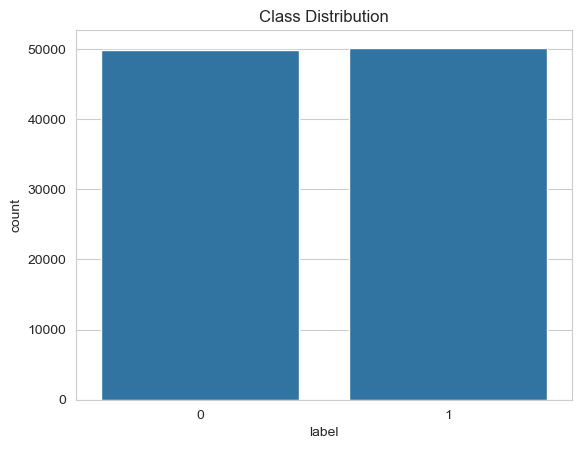

In [4]:
class_counts = df["label"].value_counts()
class_ratio = df["label"].value_counts(normalize=True)

print("Class Counts:\n", class_counts)
print("\nClass Ratio:\n", class_ratio)

sns.countplot(x="label", data=df)
plt.title("Class Distribution")
plt.show()

In [5]:
df.describe()

,x1,x2,x3,x4,x5,label
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.004570,9.992852,-0.018489,0.013421,0.004731,0.501880
std,11.171389,5.004310,5.773055,5.775636,5.767819,0.499999
min,-20.996942,0.002238,-10.539063,-10.670040,-10.598841,0.000000
25%,-9.967135,5.976215,-5.005094,-4.987583,-4.958466,0.000000
50%,0.131606,9.989948,-0.018091,0.034431,-0.001731,1.000000
75%,10.023450,14.017565,4.975708,4.989501,4.976553,1.000000
max,21.021694,20.829336,10.629644,10.609764,10.632408,1.000000


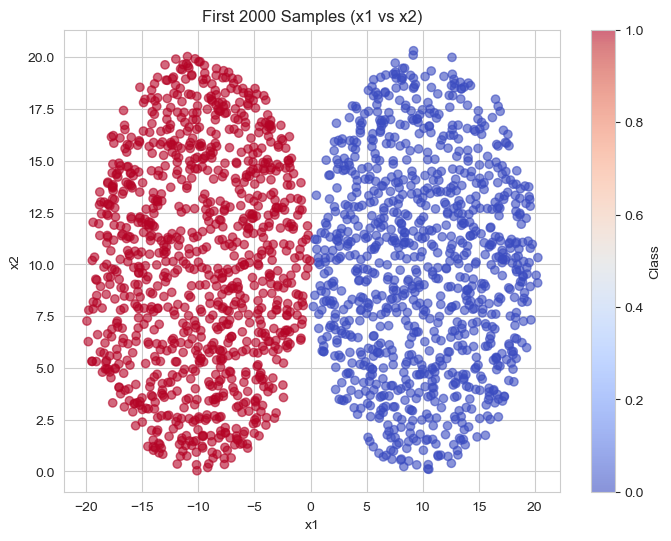

In [6]:
sample_df = df.iloc[:2000]

plt.figure(figsize=(8,6))
plt.scatter(
    sample_df["x1"],
    sample_df["x2"],
    c=sample_df["label"],
    cmap="coolwarm",
    alpha=0.6
)
plt.title("First 2000 Samples (x1 vs x2)")
plt.xlabel("x1")
plt.ylabel("x2")
plt.colorbar(label="Class")
plt.show()

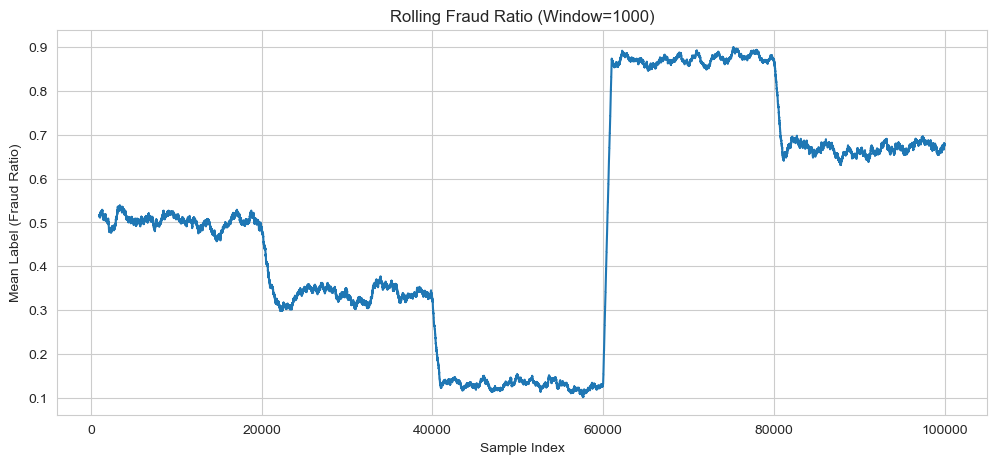

In [7]:
window_size = 1000

rolling_ratio = (
    df["label"]
    .rolling(window_size)
    .mean()
)

plt.figure(figsize=(12,5))
plt.plot(rolling_ratio)
plt.title(f"Rolling Fraud Ratio (Window={window_size})")
plt.xlabel("Sample Index")
plt.ylabel("Mean Label (Fraud Ratio)")
plt.show()
